In [2]:
import numpy as np
import matplotlib.pyplot as plt

import double_lattice

# Double lattice demo
We have some transmission lines in series with
$$ Z_0 = 50 [Ohm]$$
$$ Z_1 = 70 [Ohm]$$

and a time delay of
$$ TD0 = 250 [ps] $$
$$ TD1 = 150 [ps] $$

The driver has a resitance of
$$ r_s = 25 [Ohm] $$

and a swing of
$$ v_s = 0 \rightarrow 2 V$$

and the lines are terminated with
$$ r_t = 12.5 [Ohm] $$

We denote the driver side af near end and termination side as far end.

In [3]:
z0 = 50
z1 = 70

td0 = 250*1e-12  # [s]
td1 = 150*1e-12

r_s = 25  # [Ohm] meaning it's overdriven, which results in a nice and clear 'ringing' effect
v_s = 2  # [V]

r_t  = 12.5

In this case we have to consider multiple back and forth reflection and transmission these have the values of

Reflections:
$$\rho _ 1 = \frac{R_s - Z_{01}}{R_s + Z_{01}} $$
$$\rho _ 2 = \frac{Z_{02} - Z_{01}}{Z_{01} + Z_{02}} $$
$$\rho _ 3 = \frac{Z_{01} - Z_{02}}{Z_{01}+ Z_{02}} $$
$$\rho _ 4 = \frac{R_t - Z_{02}}{R_t+ Z_{02}} $$

Transmissions:
$$T_2 = 1 + \rho_2 $$
$$T_3 = 1 + \rho_3 $$

Now, the rest is a running a normal lattice, with taking  care of these additional reflections and transmissions.

To run this, I've come up with an algorithm, of handling outgoing waves in a list. A wave going into the A surface, would be denoted
$$v_i = (time=t, (v_a, 0, 0, 0))$$
it would then be reflected and send into B as

$$ v_{i+1} = (time=t + timedelay_0, (0, v_a\cdot\rho_a, 0, 0)) $$

and the near end value would be updated with the in and outgoing waves as

$$Near_{i} = Near_{i-1} + v_a \cdot (1 + \rho_a). $$

In each iteration, we update the timestamp as $time_i = time_{i-1} + timedelay(medium)$. This is to keep track of events in chronological order. After all of this is done, we enter the wave into a priority queue.

The interesting part comes, when a wave goes into a transitory interface such as B or C. Here we update the beam as going through to A or D, but also generate a new wave that has been reflected going to the other side.

In the case of B, that would look like:
$$ (time=t, (0, v_b, 0, 0)) \rightarrow \begin{cases} (time=t + timedelay_1, (0, 0, 0, T_b\cdot v_b))\\
(time=t + timedelay_0, (v_b\cdot\rho_b, 0, 0, 0)) \end{cases} $$

Both of these events are then inserted into the priority queue, from which we draw the next event with the lowest timestamp. If we ever draw a wave, where the amplitude is less than some tolerance of the steady state, we remove it.

In [5]:
near_end_V, central_V, far_end_V = double_lattice.run_diagram(v_source=v_s, time_delays_tuple = (td0, td1), line_impedances_tuple = (z0, z1), r_source=r_s, r_termination=r_t)

Reflection coefficients:
	rho_abcd = (-0.3333333333333333, 0.16666666666666666, -0.16666666666666666, -0.696969696969697).
Steady state voltages:
	v_steady = 0.6667 [V]
Initial voltages:
	v_initial = 1.3333 [V]


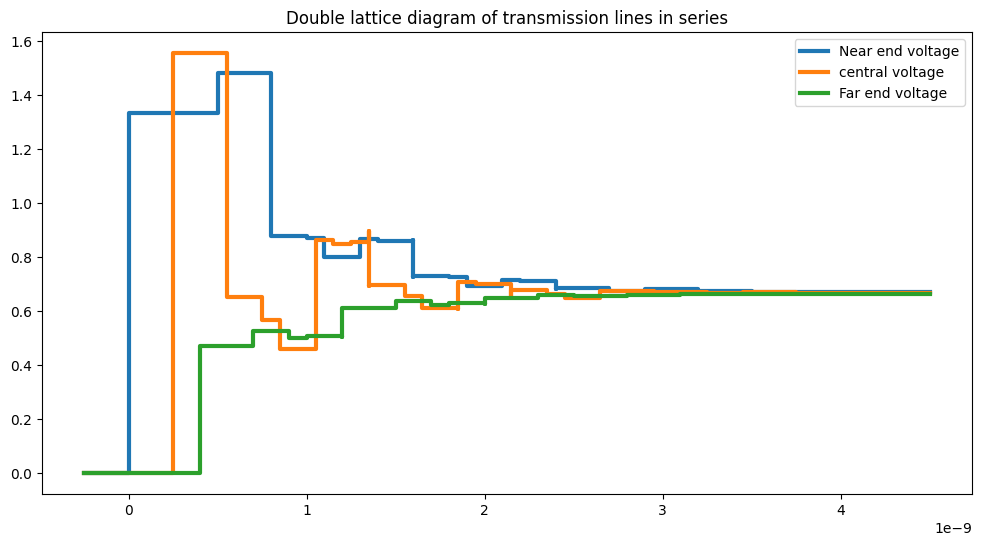

In [10]:
fig, ax = plt.subplots(1, figsize=(12, 6))

ax.set_title('Double lattice diagram of transmission lines in series')
ax.plot(near_end_V[0], near_end_V[1], label='Near end voltage', linewidth=3)
ax.plot(central_V[0], central_V[1], '', label='central voltage', linewidth=3)
ax.plot(far_end_V[0], far_end_V[1], label='Far end voltage', linewidth=3)
ax.legend()

plt.legend()
plt.show()